In [54]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv

In [55]:
data1 = pd.read_csv("delivery_time.csv")

In [56]:
data1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [57]:
data1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [58]:
#Data Structure 
type(data1)

pandas.core.frame.DataFrame

In [59]:
data1.shape

(21, 2)

In [60]:
#data types
data1.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [61]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [62]:
data1.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [63]:
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
data1.copy()
data1.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [64]:
#Count of duplicated rows
data1.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [65]:
data1[data1.duplicated()].shape

(0, 2)

In [66]:
#Print the duplicated rows
data1[data1.duplicated()]

,Delivery Time,Sorting Time


In [67]:
data_cleaned1=data1.drop_duplicates()

In [68]:
data_cleaned1.shape

(21, 2)

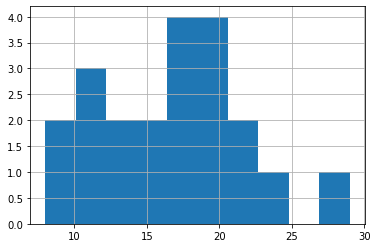

In [69]:
# histogram of Ozone
data_cleaned2['Delivery Time'].hist()

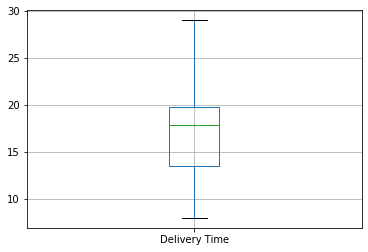

In [70]:
#Box plot
data_cleaned2.boxplot(column=['Delivery Time'])

In [71]:
#Descriptive stat
data_cleaned2['Delivery Time'].describe()

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery Time, dtype: float64

In [72]:
data_cleaned2

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


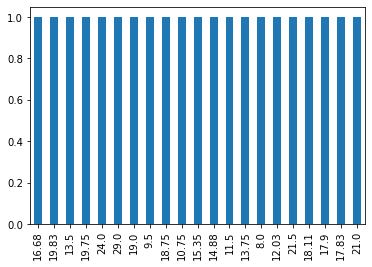

In [73]:
#Bar plot
data1['Delivery Time'].value_counts().plot.bar()

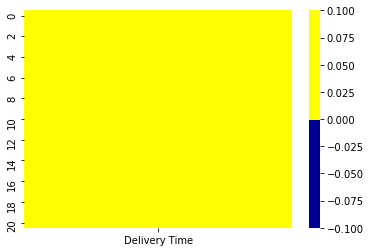

In [74]:
import seaborn as sns
cols = data_cleaned2.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data_cleaned2[cols].isnull(),
            cmap=sns.color_palette(colours))

In [75]:
data_cleaned3=data_cleaned2.dropna()
data_cleaned3.shape

(21, 1)

In [76]:
data_cleaned2[data_cleaned2.isnull().any(axis=1)].shape

(0, 1)

In [77]:
#Mean Imputation
mean = data_cleaned2['Delivery Time'].mean()
print(mean)

16.79095238095238


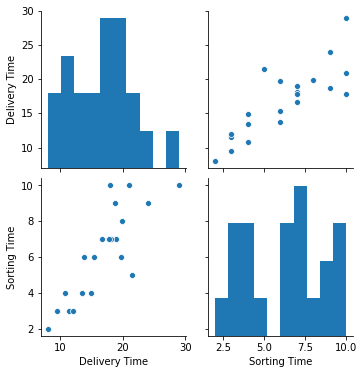

In [78]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data1)

In [79]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [80]:
data1.values

array([[21.  , 10.  ],
       [13.5 ,  4.  ],
       [19.75,  6.  ],
       [24.  ,  9.  ],
       [29.  , 10.  ],
       [15.35,  6.  ],
       [19.  ,  7.  ],
       [ 9.5 ,  3.  ],
       [17.9 , 10.  ],
       [18.75,  9.  ],
       [19.83,  8.  ],
       [10.75,  4.  ],
       [16.68,  7.  ],
       [11.5 ,  3.  ],
       [12.03,  3.  ],
       [14.88,  4.  ],
       [13.75,  6.  ],
       [18.11,  7.  ],
       [ 8.  ,  2.  ],
       [17.83,  7.  ],
       [21.5 ,  5.  ]])

In [31]:
array = data1.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


[[0.62 1.  ]
 [0.26 0.25]
 [0.56 0.5 ]
 [0.76 0.88]
 [1.   1.  ]]


In [32]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [33]:
array = data1.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[ 0.85  1.54]
 [-0.66 -0.88]
 [ 0.6  -0.08]
 [ 1.46  1.13]
 [ 2.47  1.54]]


In [34]:
EDA_report= pp.ProfileReport(data1)
EDA_report.to_file(output_file='report.html')

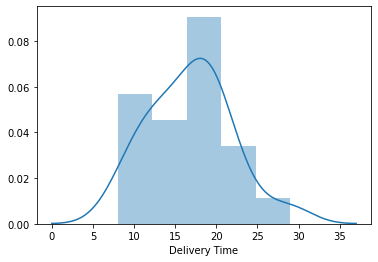

In [35]:
import seaborn as sns
sns.distplot(data1['Delivery Time'])

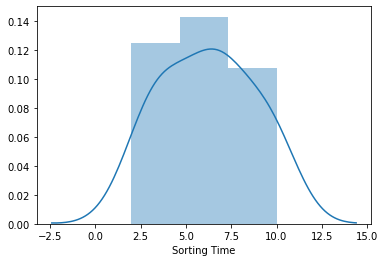

In [36]:
import seaborn as sns
sns.distplot(data1['Sorting Time'])

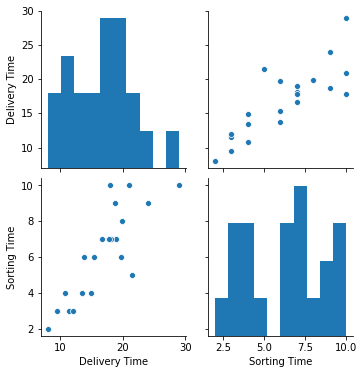

In [37]:
sns.pairplot(data1)

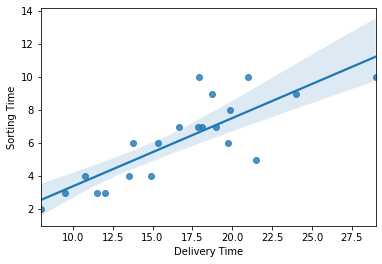

In [38]:
sns.regplot(x="Delivery Time", y="Sorting Time", data=data1);

In [39]:
#Predict for 20 and 30Delivery Time circulation
newdata=pd.Series([20,30])

In [40]:

data_pred=pd.DataFrame(newdata,columns=['Delivery Time'])


In [41]:
import statsmodels.formula.api as smf

In [45]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Delivery time')

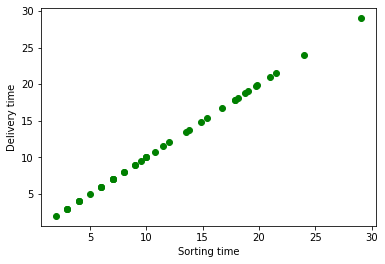

In [47]:
plt.scatter(x=data1, y=data1, color='green')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

{'whiskers': [<matplotlib.lines.Line2D at 0x1fefabc4460>,
 'caps': [<matplotlib.lines.Line2D at 0x1fefabc4b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fefabc4100>,
 'medians': [<matplotlib.lines.Line2D at 0x1fefabcf220>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fefabcf520>,
 'means': []}

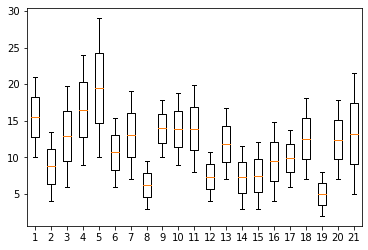

In [48]:
plt.boxplot(data1)

(array([[0., 1., 0., 1., 0.],
        [1., 0., 1., 0., 0.],
        [1., 0., 0., 1., 0.],
        [0., 1., 0., 0., 1.],
        [0., 1., 0., 0., 1.],
        [1., 0., 1., 0., 0.],
        [1., 0., 0., 1., 0.],
        [1., 1., 0., 0., 0.],
        [0., 1., 1., 0., 0.],
        [0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0.],
        [1., 1., 0., 0., 0.],
        [1., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 0., 1., 0., 0.],
        [1., 0., 1., 0., 0.],
        [1., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 0., 1., 0., 0.],
        [1., 0., 0., 1., 0.]]),
 array([ 2. ,  7.4, 12.8, 18.2, 23.6, 29. ]),
 <a list of 21 Lists of Patches objects>)

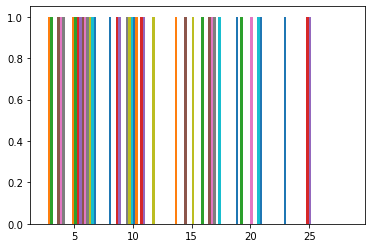

In [49]:
plt.hist(data1, bins=5)

In [91]:
df=data1.rename(columns={"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"})

In [92]:
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [94]:
model=smf.ols("Delivery_Time~Sorting_Time",data=df).fit()

In [95]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [96]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           3.98e-06
Time:                        08:40:55   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
model2=smf.ols("Delivery_Time~np.log(Sorting_Time)",data=df).fit()

In [99]:
model2.params

Intercept               1.159684
np.log(Sorting_Time)    9.043413
dtype: float64

In [100]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           2.64e-06
Time:                        08:42:41   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
model2.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,-3.97778,6.297147
np.log(Sorting_Time),6.16977,11.917057


In [102]:
model.conf_int(0.05) # 95% confidence interval


,0,1
Intercept,2.979134,10.186334
Sorting_Time,1.108673,2.189367


In [104]:
pred2 = model.predict(df) # Predicted values of dt using the model


Text(0, 0.5, 'Delivery time')

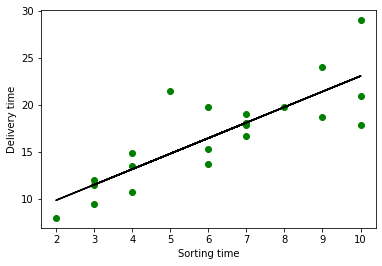

In [107]:
plt.scatter(x=df.Sorting_Time, y=df.Delivery_Time, color='green')
plt.plot(df.Sorting_Time, pred2,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")


In [109]:
pred3 = model2.predict(df) # Predicted values of dt using the model

Text(0, 0.5, 'Delivery time')

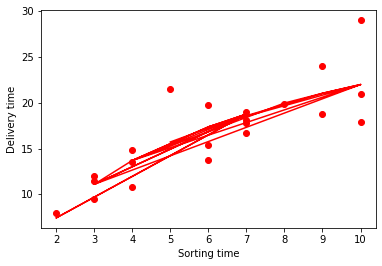

In [112]:
plt.scatter(x=df.Sorting_Time, y=df.Delivery_Time, color='red')
plt.plot(df.Sorting_Time, pred3,color='red')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")


Model2 is slightly better than Model and has moderate corelation.